In [422]:
#https://docs.google.com/document/d/10BvOY7bJT0aRuta2g1mmfxdz-RxIvbAZd_4zmeg7is0/edit

In [423]:
# Import standard notebook libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtic
#import seaborn as sns
#from sklearn import metrics

plt.style.use("fivethirtyeight")

In [424]:
#Import the data from CSV
complaints_path = "../nypd-misconduct-complaints/CCRB_database_raw.csv"
complaints = pd.read_csv(complaints_path)

In [425]:
complaints.head()

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
0,7/14/20,43921,Richard,Aalbue,POM,H BKLYN,3619.0,6290465.0,NaN,Force,Force,Unsubstantiated,NaN,NaN
1,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8300607.0,NaN,Force,Force,Complainant Unavailable,NaN,NaN
2,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8800504.0,2/15/88,Force,Beat,Unsubstantiated,NaN,NaN
3,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/92,Abuse of Authority,Vehicle Searched,Unsubstantiated,NaN,NaN
4,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/92,Discourtesy,Nasty Words,Unsubstantiated,NaN,NaN


In [426]:
complaints.shape

(323911, 14)

In [427]:
complaints.dtypes

AsOfDate              object
Unique Id              int64
First Name            object
Last Name             object
Rank                  object
Command               object
ShieldNo             float64
Complaint Id         float64
Incident Date         object
FADO Type             object
Allegation            object
Board Disposition     object
NYPDDisposition       object
PenaltyDesc           object
dtype: object

In [428]:
complaints.isna().sum()

AsOfDate                  0
Unique Id                 0
First Name                5
Last Name                 0
Rank                      0
Command                   0
ShieldNo                 56
Complaint Id          33262
Incident Date         53493
FADO Type             33262
Allegation            33683
Board Disposition     33262
NYPDDisposition      312447
PenaltyDesc          313919
dtype: int64

In [429]:
complaints = complaints.dropna(axis=0, subset=["Incident Date"])

In [430]:
#Engineer new columns
complaints.loc[:,"Full Name"] = complaints.loc[:,"First Name"] + " " + complaints.loc[:,"Last Name"]
complaints['Year'] = pd.DatetimeIndex(complaints['Incident Date']).year

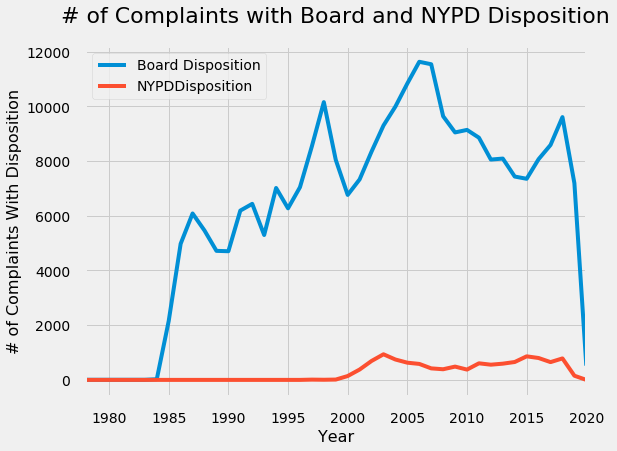

In [431]:
complaints_per_year = complaints.groupby(by='Year')[('Board Disposition','NYPDDisposition')].count()
ax = complaints_per_year.plot(figsize=(8,6))

ax.set_title("# of Complaints with Board and NYPD Disposition", fontsize=22,y=1.05)
ax.set_ylabel("# of Complaints With Disposition",fontsize=16)
ax.set_xlabel("Year",fontsize=16)
ax.tick_params(axis='x', pad=15)
ax.tick_params(axis='y', pad=15)

In [432]:
cond = (complaints.loc[:,"Year"] > 2018) | (complaints.loc[:,"Year"] < 2000)
complaints = complaints.loc[~cond,:]

In [433]:
complaints.loc[:,"Board Disposition"].unique()

array(['Unsubstantiated', 'Exonerated', 'Alleged Victim Unavailable',
       'Complainant Uncooperative', 'Unfounded',
       'Substantiated (Command Lvl Instructions)',
       'Substantiated (Formalized Training)', 'Complainant Unavailable',
       'Miscellaneous - Subject Retired', 'Complaint Withdrawn',
       'Alleged Victim Uncooperative', 'Substantiated (Charges)',
       'Victim Unidentified', 'Substantiated (Command Discipline B)',
       'Substantiated (Command Discipline A)',
       'Substantiated (Command Discipline)',
       'Closed - Pending Litigation', 'Miscellaneous - Subject Resigned',
       'Substantiated (Instructions)', 'Miscellaneous',
       'Miscellaneous - Subject Terminated',
       'Substantiated (No Recommendations)', 'Witness Uncooperative',
       'Witness Unavailable', 'Officer(s) Unidentified'], dtype=object)

In [434]:
complaints.loc[:,"Board Disposition"].value_counts()

Unsubstantiated                             50367
Exonerated                                  43038
Complainant Uncooperative                   23724
Unfounded                                   16171
Complaint Withdrawn                          8516
Substantiated (Charges)                      7253
Complainant Unavailable                      5098
Alleged Victim Uncooperative                 4835
Alleged Victim Unavailable                   1841
Miscellaneous - Subject Retired              1370
Substantiated (Command Discipline)           1287
Substantiated (Formalized Training)           984
Substantiated (Command Discipline A)          976
Miscellaneous - Subject Resigned              888
Closed - Pending Litigation                   840
Substantiated (Command Discipline B)          823
Victim Unidentified                           473
Substantiated (Instructions)                  360
Substantiated (Command Lvl Instructions)      313
Miscellaneous                                 207


In [435]:
board_substantiated = complaints.loc[:,"Board Disposition"].str.contains("Substantiated")
complaints.loc[:,"Board Substantiated"] = board_substantiated
complaints.loc[:,"Board Substantiated"] = complaints.loc[:,"Board Substantiated"].astype(int)
complaints.loc[:,"Board Substantiated"].value_counts()

0    157501
1     12092
Name: Board Substantiated, dtype: int64

In [436]:
complaints.loc[:,"NYPDDisposition"].unique()

array([nan, 'Instructions', 'Command Discipline - A', 'APU Not guilty',
       'APU Closed: Retired', 'APU Guilty', 'No Disciplinary Action-DUP',
       'Command Discipline - B', 'Formalized Training',
       'Not Guilty - DCT', 'Charge Dismissed - DCT', 'Guilty - DCT',
       'APU Closed: Other', 'No Disciplinary Action-SOL',
       'Plead Guilty - OATH', 'APU Dismissed', 'Plead Guilty - DCT',
       'APU Retained, with discipline', 'Charge Dismissed - OATH',
       'APU - Decision Pending', 'APU Closed: Dismissed by APU',
       'Command Level Instructions',
       'APU Closed: Retained, with discipline', 'No Finding', 'Filed',
       'APU Formalized Training', 'APU Closed: SOL Expired prior to APU',
       'Negttn-Nolo contendre', 'Negttn-Guilty',
       'APU Closed: Previously adjudicated, with discipline',
       'APU Closed: Retained, without discipline',
       'APU Closed: Previously adjudicated, without discipline',
       'APU Nolo contendere', 'Not Guilty - OATH',
       'AP

In [437]:
complaints.loc[:,"NYPDDisposition"].value_counts()

Instructions                                              2308
No Disciplinary Action-DUP                                1601
Command Discipline - A                                    1562
Formalized Training                                        964
Command Discipline - B                                     803
Not Guilty - DCT                                           654
APU Guilty                                                 650
APU Not guilty                                             405
Plead Guilty - DCT                                         319
Guilty - DCT                                               311
Charge Dismissed - DCT                                     311
Filed                                                      279
No Disciplinary Action-SOL                                 269
APU - Decision Pending                                     233
APU Closed: Retained, with discipline                       75
APU Dismissed                                          

In [438]:
disposition_substantiated = complaints.loc[:,"NYPDDisposition"].isin(
       ['Instructions',
        'Command Level Instructions',
        'Formalized Training',
        'Command Discipline - A',
        'Command Discipline - B',
        'Plead Guilty - DCT'
        'Guilty - DCT',
        'Plead Guilty - OATH',
        'Guilty - OATH',
        'APU Instructions',
        'APU Command Discipline',
        'APU Command Discipline B',
        'APU Nolo contendere',
        'APU Retained, with discipline',
        'APU Previously adjudicated, with discipline',
        'APU Closed: Retained, with discipline',
        'APU Closed: Previously adjudicated, with discipline',
        'Negttn-Nolo contendre',
        'Negttn-Guilty',
        ])

penalty_unsubstantiated = complaints.loc[:,"PenaltyDesc"].isnull()
substantiated = disposition_substantiated | ~penalty_unsubstantiated
complaints.loc[:,"NYPD Substantiated"] = substantiated
complaints.loc[:,"NYPD Substantiated"] = complaints.loc[:,"NYPD Substantiated"].astype(int)

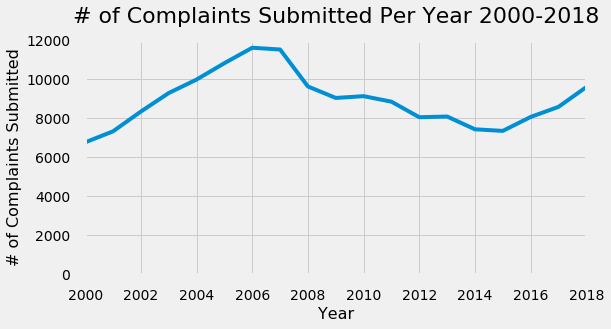

In [439]:
complaints_per_year = complaints.groupby(by='Year')['Complaint Id'].count()
ax = complaints_per_year.plot(figsize=(8,4))

ax.set_title("# of Complaints Submitted Per Year 2000-2018", fontsize=22,y=1.05)
ax.set_ylabel("# of Complaints Submitted",fontsize=16)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylim(0,12_000)
ax.tick_params(axis='x', pad=15)
ax.tick_params(axis='y', pad=15)

In [440]:
complaints.groupby(by=['Year',"FADO Type"])['Year'].count()

Year  FADO Type         
2000  Abuse of Authority    2904
      Discourtesy           1380
      Force                 2227
      Offensive Language     251
2001  Abuse of Authority    3139
                            ... 
2017  Offensive Language     254
2018  Abuse of Authority    5789
      Discourtesy           1123
      Force                 2453
      Offensive Language     241
Name: Year, Length: 76, dtype: int64

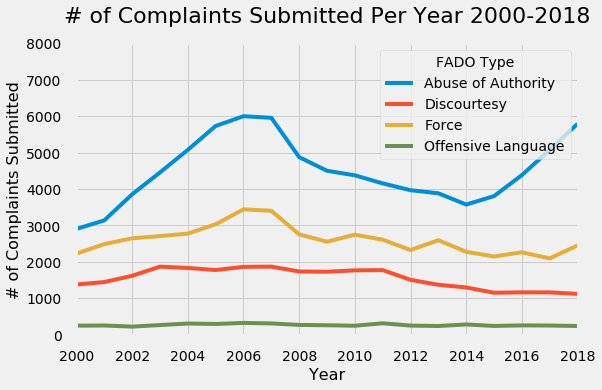

In [441]:
complaints_per_year_by_type = complaints.groupby(by=['Year',"FADO Type"])['Complaint Id'].count().unstack()
ax = complaints_per_year_by_type.plot(figsize=(8,5))
ax.set_title("# of Complaints Submitted Per Year 2000-2018", fontsize=22,y=1.05)
ax.set_ylabel("# of Complaints Submitted",fontsize=16)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylim(0,8_000)
ax.tick_params(axis='x', pad=15)
ax.tick_params(axis='y', pad=15)

In [442]:
annual_complaints = complaints.groupby(by='Year')['Complaint Id'].count()
annual_complaints = annual_complaints.reset_index()
board_sub = complaints.groupby(by=['Year','Board Substantiated'])['Complaint Id'].count().unstack()
board_sub = board_sub.reset_index()
nypd_sub = complaints.groupby(by=['Year','NYPD Substantiated'])['Complaint Id'].count().unstack()
nypd_sub.reset_index();

In [443]:
annual_complaints = annual_complaints.merge(board_sub,how='left',on="Year").merge(nypd_sub,how='left',on="Year")
annual_complaints = annual_complaints.drop(columns=["0_x","0_y"],axis=1);

In [444]:
annual_complaints.columns=(["Year","Complaints","Board Substantiated","NYPD Substantiated"])

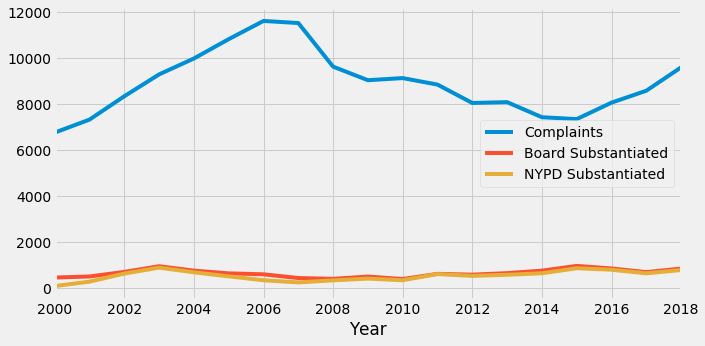

In [445]:
ax = annual_complaints.plot(x="Year",figsize=(10,5))

In [446]:
board_sub_rate = annual_complaints.loc[:,"Board Substantiated"] / total_complaints.loc[:,"Complaints"]*100
annual_complaints.loc[:,"Board Substantiation Rate"] = round(board_sub_rate,2)
nypd_sub_rate = annual_complaints.loc[:,"NYPD Substantiated"] / total_complaints.loc[:,"Complaints"]*100
annual_complaints.loc[:,"NYPD Substantiation Rate"] = round(nypd_sub_rate,2)

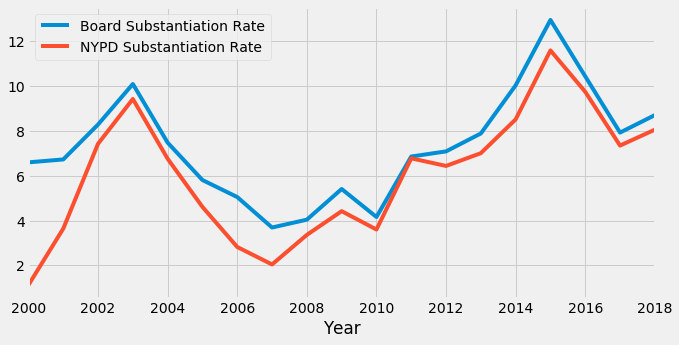

In [447]:
ax = annual_complaints.plot(x="Year",y=["Board Substantiation Rate","NYPD Substantiation Rate"],figsize=(10,5))

In [448]:
complaints_by_type = complaints.groupby(by='FADO Type')['Complaint Id'].count()
complaints_by_type = complaints_by_type.reset_index()
board_sub = complaints.groupby(by=['FADO Type','Board Substantiated'])['Complaint Id'].count().unstack()
board_sub = board_sub.reset_index()
nypd_sub = complaints.groupby(by=['FADO Type','NYPD Substantiated'])['Complaint Id'].count().unstack()
nypd_sub.reset_index()
complaints_by_type = complaints_by_type.merge(board_sub,how='inner',on="FADO Type").merge(nypd_sub,how='inner',on="FADO Type");

In [449]:
complaints_by_type = complaints_by_type.drop(columns=["0_x","0_y"],axis=1)
complaints_by_type.columns=(["FADO Type","Complaints","Board Substantiated","NYPD Substantiated"]);

In [450]:
board_sub_rate = complaints_by_type.loc[:,"Board Substantiated"] / complaints_by_type.loc[:,"Complaints"]*100
complaints_by_type.loc[:,"Board Substantiation Rate"] = round(board_sub_rate,2)
nypd_confirmation_rate = complaints_by_type.loc[:,"NYPD Substantiated"] / complaints_by_type.loc[:,"Board Substantiated"]*100
complaints_by_type.loc[:,"NYPD Confirmation Rate"] = round(nypd_confirmation_rate,2)
nypd_sub_rate = complaints_by_type.loc[:,"NYPD Substantiated"] / complaints_by_type.loc[:,"Complaints"]*100
complaints_by_type.loc[:,"NYPD Substantiation Rate"] = round(nypd_sub_rate,2)

In [451]:
complaints_by_type.loc[:,"Complaint %"] = (complaints_by_type['Complaints'] / complaints_by_type['Complaints'].sum()) * 100

In [452]:
cols = ["FADO Type","Complaint %","NYPD Substantiation Rate"]

In [453]:
complaints_by_type = complaints_by_type.loc[:,cols].sort_values("Complaint %",ascending=False)

In [454]:
complaints_by_type

,FADO Type,Complaint %,NYPD Substantiation Rate
0,Abuse of Authority,50.401255,8.72
2,Force,29.214649,2.17
1,Discourtesy,17.368641,4.38
3,Offensive Language,3.015455,3.34


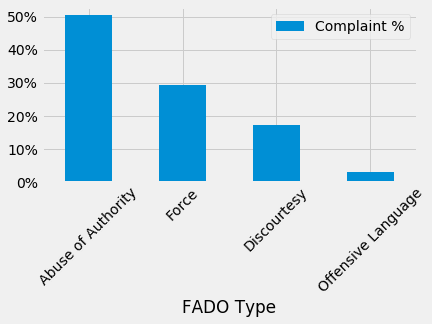

In [455]:
ax = complaints_by_type.plot(x="FADO Type",y="Complaint %",figsize=(6,3),kind="bar",color="#008fd5")
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter());

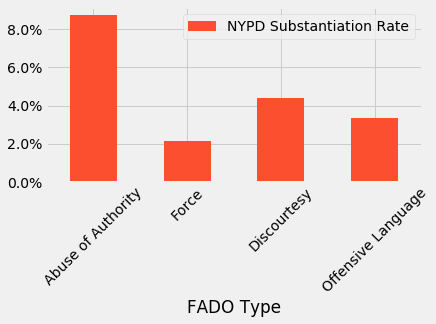

In [456]:
ax = complaints_by_type.plot(x="FADO Type",y=["NYPD Substantiation Rate"],figsize=(6,3),kind="bar",color="#fc4f30")
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter());